<a href="https://colab.research.google.com/github/Mittra19/K-SVD/blob/main/Dictionary_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import OrthogonalMatchingPursuit

In [ ]:
from sklearn.datasets import make_regression
X, y = make_regression(noise=4, random_state=0)
reg = OrthogonalMatchingPursuit().fit(X, y)
reg.score(X, y)

0.9991964219358707

In [ ]:
X

array([[ 0.52201212, -0.74586233, -0.76478197, ...,  0.24107233,
        -0.02128299, -2.43813256],
       [-1.40610477,  1.61424955,  0.43077113, ..., -1.54825432,
         0.40389602,  1.93671246],
       [ 0.81615458, -1.13698783, -0.08872441, ...,  0.10117749,
        -0.21549664,  0.02932343],
       ...,
       [-0.26716118,  1.69183964, -1.43349522, ...,  1.06547809,
         0.08182017, -0.12996586],
       [ 0.78257888, -0.74747318,  0.81797761, ..., -0.42870207,
        -1.36475823, -0.02186991],
       [ 0.40959412, -1.38552558, -0.1334914 , ...,  0.79855081,
         0.32978808, -0.9317254 ]])

In [ ]:
y

array([ -83.08654302,  -86.87929348,  143.64879825,   53.11767063,
       -137.12562568,  -76.17911331,  120.97431801, -152.98264176,
         92.4214761 , -178.17606253,  255.89033696,  109.30931948,
        -25.14676048,  122.48056043,  -63.43119168,   63.1024734 ,
        170.08532165,  298.62248374,  147.08015727,   13.98238816,
        -63.20215872, -160.3243681 ,   98.48277148,  -64.15689374,
         89.44793595, -199.88331975, -235.11439276,  -92.80330438,
         65.97137792, -240.35957012,   58.53672285,   17.64118695,
         39.19532947, -159.67494116,  214.40536597, -115.37493987,
         17.39566243,   17.03944817, -190.71934088, -253.19313503,
        152.34316164,   45.80067497,   94.40807603,    3.99305466,
        -13.84420769, -151.37817847, -104.29954489, -219.2608145 ,
        -30.42886711, -162.87549183, -103.4805689 ,  -25.85948739,
       -140.55707091,   22.21891754,  -26.26358559,   25.29018877,
         -4.88580563, -156.20005888,   57.62585988,    4.61951

In [ ]:
reg.predict(X[:1,])

array([-78.38545074])

Automatically created module for IPython interactive environment
100
rows:  100
columns:  512
[ 46  68  76 101 123 158 195 226 227 268 269 355 359 399 467 492 494]


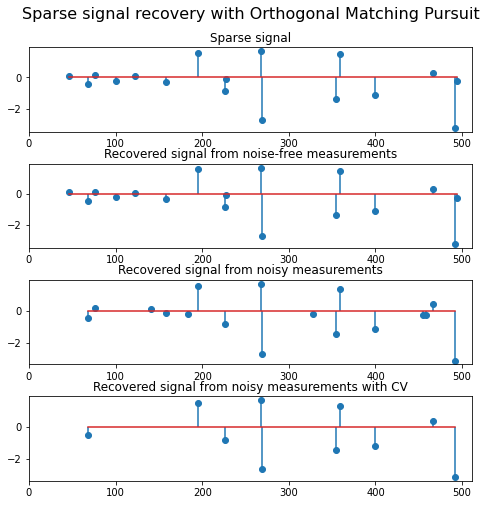

In [ ]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal

n_components, n_features = 512, 100
n_nonzero_coefs = 17

# generate the data

# y = Xw
# |x|_0 = n_nonzero_coefs

y, X, w = make_sparse_coded_signal(n_samples=1,
                                   n_components=n_components,
                                   n_features=n_features,
                                   n_nonzero_coefs=n_nonzero_coefs,
                                   random_state=0)
print(len(y))
idx, = w.nonzero()
print("rows: ",str(len(X)))
print("columns: ",str(len(X[0])))
print(idx)
# distort the clean signal
y_noisy = y + 0.05 * np.random.randn(len(y))

# plot the sparse signal
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx], use_line_collection=True)

# plot the noise-free reconstruction
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X, y)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

# plot the noisy reconstruction
omp.fit(X, y_noisy)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

# plot the noisy reconstruction with number of non-zeros set by CV
omp_cv = OrthogonalMatchingPursuitCV()
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 4)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle('Sparse signal recovery with Orthogonal Matching Pursuit',
             fontsize=16)
plt.show()

In [1]:
from sklearn.decomposition import DictionaryLearning
import numpy as np

In [2]:
from sklearn import datasets

In [3]:
digits = datasets.load_digits()

In [4]:
digits.data.shape

(1797, 64)

In [5]:
dl = DictionaryLearning(n_components=36, fit_algorithm='lars', transform_algorithm='omp', n_jobs=-1)

In [6]:
X_dict = dl.fit_transform(digits.data[:20,:])

In [7]:
xd = dl.fit(digits.data[:20,:])

In [8]:
X_dict

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  5.54075807e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+

In [15]:
X_dict[0].shape

(36,)

In [10]:
a = X_dict[0]
a = np.array(a)
a = a.reshape(a.shape[0], 1)
a.shape

(36, 1)

In [11]:
import matplotlib.pyplot as plt


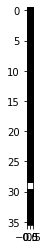

In [12]:
plt.imshow(a, cmap='gray')

In [13]:
from sklearn.decomposition import dict_learning

In [14]:
V, U, E = dict_learning(digits.data[:30, :], n_components=36, n_jobs = -1, alpha=1, max_iter=1000, tol=1e-8,
                 method='lars')

In [16]:
V

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
U

array([[-0.00548362, -0.05009001,  0.03903189, ..., -0.10421281,
        -0.04598236, -0.25511911],
       [ 0.        ,  0.        ,  0.10733126, ...,  0.23255107,
         0.19677398,  0.01788854],
       [ 0.        ,  0.        , -0.12040366, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.142994  , ..., -0.214491  ,
        -0.23236525, -0.01787425],
       [ 0.        ,  0.        , -0.12881496, ..., -0.16561924,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.21767868, ...,  0.        ,
         0.        ,  0.        ]])

In [18]:
U.shape

(36, 64)

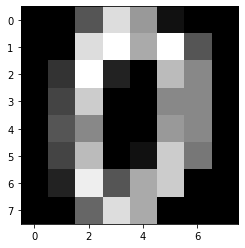

In [19]:
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')

In [20]:
U[0].shape

(64,)

In [21]:
U[0]

array([-0.00548362, -0.05009001,  0.03903189,  0.1809765 ,  0.18932348,
       -0.07895904, -0.04952146, -0.10439134,  0.0278849 , -0.03229385,
       -0.02909015, -0.08642242, -0.09927473, -0.10733263, -0.21535614,
        0.1797347 , -0.02668094, -0.01217039, -0.1195586 ,  0.01365493,
       -0.00827955,  0.25696743, -0.19872378,  0.06342216,  0.05242533,
       -0.16836608,  0.2088332 , -0.01389573,  0.11380729, -0.05128352,
        0.07511503, -0.098652  , -0.06333169, -0.20261162, -0.0140037 ,
        0.00198789, -0.03081474,  0.02427815,  0.17956065, -0.25685646,
        0.05700482,  0.1280963 , -0.16831927,  0.01257833, -0.11018511,
       -0.07790486, -0.07666956, -0.31110451, -0.01393695, -0.02371481,
       -0.13538448, -0.03451165,  0.18182617, -0.14239278, -0.07960388,
       -0.15422495,  0.16347914,  0.06810161,  0.0272953 , -0.19579799,
        0.02167881, -0.10421281, -0.04598236, -0.25511911])

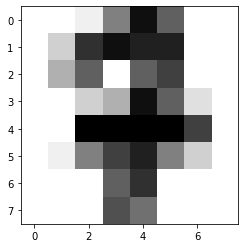

In [ ]:
plt.imshow(U[35].reshape(6, 6), cmap='gray')

#K-SVD

In [15]:
import numpy as np

In [1]:
#Import data
from sklearn import datasets
digits = datasets.load_digits()

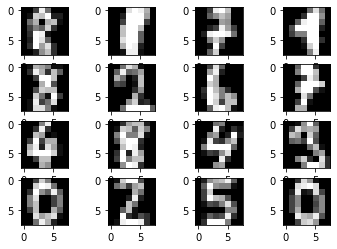

In [13]:
#Display data
import random
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 4)
for i in range(4):
  for j in range(4):
    k = random.randint(0, digits.data.shape[0])
    dg = digits.data[k].reshape(8, 8)
    axs[i, j].imshow(dg, cmap='gray')

plt.show()

In [18]:
#Dictionary initialisation
k = 0
#Choose the value of M, i.e. the number of features/
M = 500
A = np.array(digits.data[:M, :].T)
print(A.shape)

(64, 500)